# Producing Report

In [164]:
#Imports
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline

#Global Elements
LOGFILENAME = './Apache_2k.log'

## Functions

In [3]:
#Function to Read File
def read_file():
    with open(LOGFILENAME, 'r') as fd:
        lines = fd.readlines()

    return lines

In [2]:
#Function to parse and Extract the Columns
def extract_info(line):
    arr = line.split(']')
    for i in range(len(arr)):
        stripped = arr[i].strip()
        value = stripped.replace('[', '')
        arr[i] = value
    return arr[0], arr[1], arr[2]

In [14]:
#Function to retrieve the function and error message
def extract_words(sentence):
    words = sentence.split(' ')
    first_word = words[0]
    rest_of_words = ' '.join(words[1::])
    return rest_of_words, first_word

In [83]:
#Transform Data into dataframe
def convert_to_df(lines):
    date = []
    error_type = []
    message = []
    error_def = []
    for line in lines:
        dates, error, messages = extract_info(line)
        part1, part2 = extract_words(messages)
        converted_date = datetime.strptime(dates, '%a %b %d %H:%M:%S %Y')
        date.append(converted_date)
        error_type.append(error)
        message.append(part1)
        error_def.append(part2)

    df_log = pd.DataFrame(list(zip(date, error_type, message, error_def)), 
               columns =['Date', 'Error', 'Message', "Definition"]) 
    return df_log

## Extracting Information

In [110]:
lines = read_file()
df_log = convert_to_df(lines)

In [111]:
df_log

Date   Error                                 Message  \
0    2005-12-04 04:47:44  notice  ok /etc/httpd/conf/workers2.properties   
1    2005-12-04 04:47:44   error        child workerEnv in error state 6   
2    2005-12-04 04:51:08  notice  Found child 6725 in scoreboard slot 10   
3    2005-12-04 04:51:09  notice   Found child 6726 in scoreboard slot 8   
4    2005-12-04 04:51:09  notice   Found child 6728 in scoreboard slot 6   
...                  ...     ...                                     ...   
1995 2005-12-05 19:14:11   error        child workerEnv in error state 6   
1996 2005-12-05 19:15:55  notice   Found child 6791 in scoreboard slot 8   
1997 2005-12-05 19:15:55  notice   Found child 6790 in scoreboard slot 7   
1998 2005-12-05 19:15:57  notice  ok /etc/httpd/conf/workers2.properties   
1999 2005-12-05 19:15:57   error        child workerEnv in error state 6   

            Definition  
0     workerEnv.init()  
1               mod_jk  
2           jk2_init()  
3           jk2_init()  
4           jk2_init()  
...                ...  
1995            mod_jk  
1996        jk2_init()  
1997        jk2_init()  
1998  workerEnv.init()  
1999            mod_jk  

[2000 rows x 4 columns]

In [99]:
count_df = df_log.groupby(['Error']).agg(['count'])
function_df = df_log.groupby(['Definition']).agg(['count'])

In [69]:
final_df = pd.concat([count_df['Message'], function_df['Message']])
final_df.to_csv("./Aggregate_Data.csv")

In [60]:
function_df['Message']

count
Definition             
client               32
jk2_init()          848
mod_jk              551
workerEnv.init()    569

## Graphing

In [161]:
df_graph = convert_to_df(lines)
df_graph['Date'] = [datetime.strptime(str(d.date()) + " " + str(d.hour), "%Y-%m-%d %H") for d in df_graph['Date']]

In [175]:
df_graph

Date   Error                                 Message  \
0    2005-12-04 04:00:00  notice  ok /etc/httpd/conf/workers2.properties   
1    2005-12-04 04:00:00   error        child workerEnv in error state 6   
2    2005-12-04 04:00:00  notice  Found child 6725 in scoreboard slot 10   
3    2005-12-04 04:00:00  notice   Found child 6726 in scoreboard slot 8   
4    2005-12-04 04:00:00  notice   Found child 6728 in scoreboard slot 6   
...                  ...     ...                                     ...   
1995 2005-12-05 19:00:00   error        child workerEnv in error state 6   
1996 2005-12-05 19:00:00  notice   Found child 6791 in scoreboard slot 8   
1997 2005-12-05 19:00:00  notice   Found child 6790 in scoreboard slot 7   
1998 2005-12-05 19:00:00  notice  ok /etc/httpd/conf/workers2.properties   
1999 2005-12-05 19:00:00   error        child workerEnv in error state 6   

            Definition  
0     workerEnv.init()  
1               mod_jk  
2           jk2_init()  
3           jk2_init()  
4           jk2_init()  
...                ...  
1995            mod_jk  
1996        jk2_init()  
1997        jk2_init()  
1998  workerEnv.init()  
1999            mod_jk  

[2000 rows x 4 columns]

In [176]:
date_df = df_graph.groupby(['Date']).agg(['count'])['Message'].sort_index()
date_df.plot(figsize=(12,8))
plt.ylabel("Traffic")
plt.xlabel("Date")
plt.title("Traffic Throughout The Day");

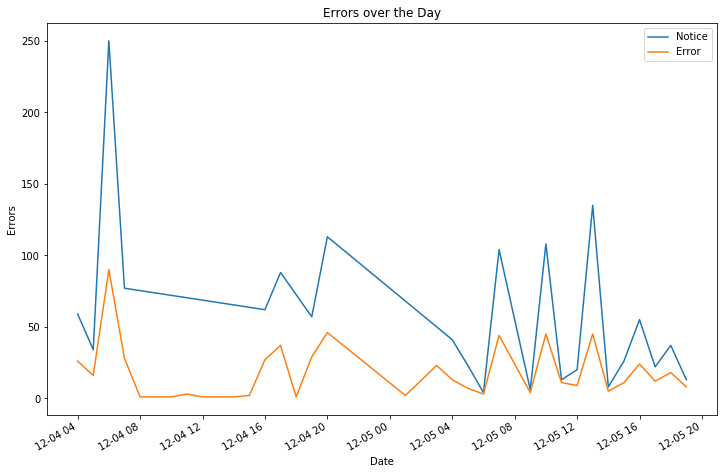

In [207]:
error_notice_df = df_graph[(df_graph['Error'] == "notice")].groupby(['Date']).agg(['count'])['Error'].sort_index()
# error_notice_df.plot(figsize=(12,8), color = 'r')
# plt.ylabel("Traffic")
# plt.xlabel("Date")
# plt.legend(["Notice"])
# plt.title("Traffic Throughout The Day");


#Error
error_df = df_graph[(df_graph['Error'] == "error")].groupby(['Date']).agg(['count'])['Error'].sort_index()
# error_df.plot(figsize=(12,8))

#Graph
ax = error_notice_df.plot()
error_df.plot(ax=ax, figsize=(12,8));
ax.legend(["Notice", "Error"])
plt.title("Errors over the Day")
plt.xlabel("Date")
plt.ylabel("Errors");

In [ ]:
# error_df = df_graph[(df_graph['Error'] == "error")].groupby(['Date']).agg(['count'])['Error'].sort_index()
# error_df.plot(figsize=(12,8))
# plt.ylabel("Traffic")
# plt.xlabel("Date")
# plt.legend(["Error"])
# plt.title("Traffic Throughout The Day");